<h2><a href="https://leetcode.com/problems/combination-sum-ii">40. Combination Sum II</a></h2><h3>Medium</h3><hr><p>Given a collection of candidate numbers (<code>candidates</code>) and a target number (<code>target</code>), find all unique combinations in <code>candidates</code>&nbsp;where the candidate numbers sum to <code>target</code>.</p>

<p>Each number in <code>candidates</code>&nbsp;may only be used <strong>once</strong> in the combination.</p>

<p><strong>Note:</strong>&nbsp;The solution set must not contain duplicate combinations.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> candidates = [10,1,2,7,6,1,5], target = 8
<strong>Output:</strong> 
[
[1,1,6],
[1,2,5],
[1,7],
[2,6]
]
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> candidates = [2,5,2,1,2], target = 5
<strong>Output:</strong> 
[
[1,2,2],
[5]
]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;=&nbsp;candidates.length &lt;= 100</code></li>
	<li><code>1 &lt;=&nbsp;candidates[i] &lt;= 50</code></li>
	<li><code>1 &lt;= target &lt;= 30</code></li>
</ul>



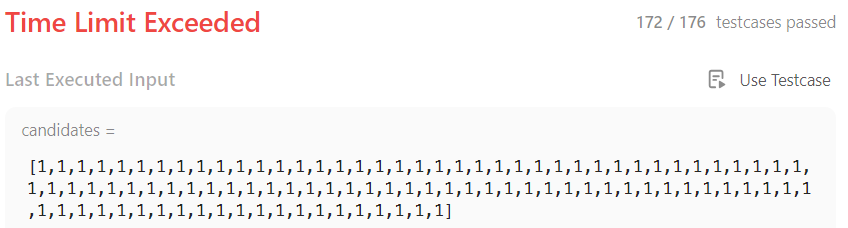

In [2]:
from typing import List
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        
        def backtrack(index, result, current, target):
            if target < 0 : return 
            if index >= len(candidates):
                if target == 0:
                    if current not in result:
                        result.append(current[:])
                return 

            # pick this 
            if candidates[index] <= target:
                current.append(candidates[index])
                target -= candidates[index]
                backtrack(index + 1, result, current, target)

                # backtracking
                current.pop()
                target += candidates[index]

            # not pick this 
            backtrack(index + 1, result, current, target)

        result = []
        candidates.sort()
        backtrack(0, result, [], target)
        return result

# Another approach for avoiding duplicates 
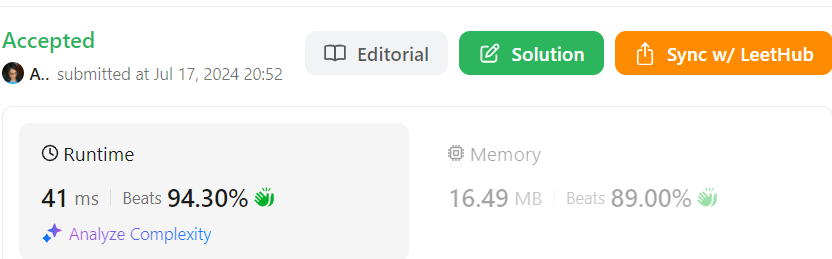

In [3]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        
        def backtrack(index, result, current, target):
            if target < 0 : return  
            
            if target == 0:
                result.append(current[:])
                return 

            # pick this 
            for i in range(index, len(candidates)):
                if i > index and candidates[i] == candidates[i-1]:
                    continue

                if candidates[i] > target:
                    break
                index = i
                current.append(candidates[i])
                backtrack(i + 1, result, current, target - candidates[i])

                # backtracking
                current.pop()

        result = []
        candidates.sort()
        backtrack(0, result, [], target)
        return result